In [4]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
#exp_names = ["figaro", "mkl", "openblas"]
#exp_names = ["figaro", "post_proc_thin", "post_proc_mkl", "mkl", "openblas"]
#exp_names = ["post_proc_thin", "post_proc_mkl", "mkl", "openblas"]
#exp_names = ["post_proc_mkl", "openblas"]
#exp_names = ["figaro_thin", "figaro_lapack"]
#exp_names = ["post_proc_mkl",  "mkl", "figaro_lapack"]
exp_names = ["figaro_thin",  "post_proc_mkl", "post_proc_thin"]
#exp_names = ["figaro_thin",  "figaro_lapack"]
#exp_names = ["post_proc_mkl", "post_proc_thin", "mkl"]
#exp_names = ["post_proc_mkl", "mkl"]
#exp_names = ["post_proc_mkl", "post_proc_thin"]
#exp_names = ["post_proc_mkl", ""]
#exp_names = ["mkl", "openblas"]
exp_paths = {"figaro_thin": "comparisons/performance/figaro/thin_diag", "mkl": "comparisons/performance/python/mkl", 
"figaro_lapack": "comparisons/performance/figaro/lapack", "openblas": "comparisons/performance/python/openblas",
"post_proc_thin": "comparisons/performance/postprocess/thin_diag", 
"post_proc_mkl": "comparisons/performance/postprocess/lapack"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
#db_names = ["DBRetailer", "DBFavorita"]
#join_orders = {"DBRetailer": "LocationRoot48",
#"DBFavorita": "StoresRoot48", "DBYelp": "BusinessRoot48"}

join_orders = {"DBRetailer": "LocationRoot48",
"DBFavorita": "StoresRoot48", "DBYelp": "BusinessRoot48"}

start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

xlsx_name = "time.xlsx"

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    perf_path = os.path.join(path_src, exp_path)
    df_measurement = pd.DataFrame(columns=db_names)

    for db_name in db_names:

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            join_order = join_orders[db_name]
            path_xlsx = os.path.join(perf_path, db_name_per, join_order, xlsx_name)
            workbook = load_workbook(filename=path_xlsx, data_only=True)
            sheet = workbook.active
            row_count = sheet.max_row
            col_idx = db_idx + 1
            col_letter = get_column_letter(col_idx)
            
            start_row_idx = 2
            np_measures = np.zeros(num_measurement)
            for row_idx_dst in range(start_row_idx, start_row_idx + num_measurement):
                offset_idx = row_idx_dst - start_row_idx
                row_idx_src = row_count - num_measurement  + offset_idx
                val = sheet.cell(row=row_idx_src, column=2).value
                print(exp_name, db_name, db_name_per, val)
                np_measures[offset_idx] = float(val)

            time_avg = np.mean(np_measures[1:])
            df_measurement.at[percent, db_name] = time_avg
            
        print(df_measurement)
        df_measurement.index = df_measurement.index.set_names(['index'])
        df_measurement = df_measurement.astype(float)
    df_measurement_exps[exp_name] = df_measurement






figaro_thin DBRetailer DBRetailer10 0.998415
figaro_thin DBRetailer DBRetailer10 0.995061
figaro_thin DBRetailer DBRetailer10 1.037081
figaro_thin DBRetailer DBRetailer10 1.006501
figaro_thin DBRetailer DBRetailer10 0.991666
figaro_thin DBRetailer DBRetailer20 1.915521
figaro_thin DBRetailer DBRetailer20 1.953098
figaro_thin DBRetailer DBRetailer20 2.003239
figaro_thin DBRetailer DBRetailer20 1.876741
figaro_thin DBRetailer DBRetailer20 1.94595
figaro_thin DBRetailer DBRetailer30 2.553226
figaro_thin DBRetailer DBRetailer30 2.479072
figaro_thin DBRetailer DBRetailer30 2.559837
figaro_thin DBRetailer DBRetailer30 2.512986
figaro_thin DBRetailer DBRetailer30 2.576479
figaro_thin DBRetailer DBRetailer40 3.521481
figaro_thin DBRetailer DBRetailer40 3.64851
figaro_thin DBRetailer DBRetailer40 3.554297
figaro_thin DBRetailer DBRetailer40 3.44648
figaro_thin DBRetailer DBRetailer40 3.518438
figaro_thin DBRetailer DBRetailer50 4.156017
figaro_thin DBRetailer DBRetailer50 4.244913
figaro_thin D

In [5]:
import csv
db_name_map = {
    "DBFavorita": "exp1perf-favorita.dat", 
    "DBRetailer": "exp1perf-retailer.dat", 
    "DBYelp": "exp1perf-yelp.dat"
    }
exp_dat_names = ["#percentage of data", "figaro-time", "mkl-time", "postproc-thin-time"]
exp_to_show = ["figaro_thin", "post_proc_mkl", "post_proc_thin"]

for db_name in db_names:
    dbs_results = []
    for exp_name in exp_to_show:
        dbs_results.append(df_measurement_exps[exp_name][db_name])
    df_db_results = pd.concat(dbs_results, axis=1)
    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:'index'})
    df_db_results.columns = exp_dat_names
    df_db_results.to_csv(db_name_map[db_name], float_format='%.2f', sep='\t', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")
"""
"""

'\nimport csv\ndb_name_map = {\n    "DBFavorita": "exp1perf-favorita.dat", \n    "DBRetailer": "exp1perf-retailer.dat", \n    "DBYelp": "exp1perf-yelp.dat"\n    }\nexp_dat_names = ["#percentage of data", "figaro-time", "mkl-time", "postproc-thin-time"]\nexp_to_show = ["figaro_thin", "post_proc_mkl", "post_proc_thin"]\n\nfor db_name in db_names:\n    dbs_results = []\n    for exp_name in exp_to_show:\n        dbs_results.append(df_measurement_exps[exp_name][db_name])\n    df_db_results = pd.concat(dbs_results, axis=1)\n    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:\'index\'})\n    df_db_results.columns = exp_dat_names\n    df_db_results.to_csv(db_name_map[db_name], float_format=\'%.2f\', sep=\'\t\', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")\n'

In [6]:
#print(df_measurement_exps["openblas"] / df_measurement_exps["post_proc_mkl"])

figaro_thin
       DBRetailer  DBFavorita    DBYelp
index                                  
10       1.007577    0.682658  0.116681
20       1.944757    1.262274  0.148378
30       2.532094    1.812790  0.184522
40       3.541931    2.397431  0.243339
50       4.222287    3.112116  0.292573
60       5.177458    3.585282  0.336145
70       5.945787    4.067977  0.535320
80       6.900633    4.707134  0.416092
90       8.080826    5.268823  0.411324
100      8.877832    6.781632  0.555206
figaro_lapack
       DBRetailer  DBFavorita    DBYelp
index                                  
10       1.802547    1.175025  0.202628
20       3.506278    2.009578  0.255359
30       5.127310    2.914307  0.330123
40       6.897666    3.911597  0.366189
50       8.637116    4.766643  0.429849
60       9.746947    5.718580  0.485284
70      11.661228    6.563289  0.643507
80      13.349075    7.569169  0.580148
90      14.941616    8.512369  0.629167
100     16.754010   10.226917  0.716126


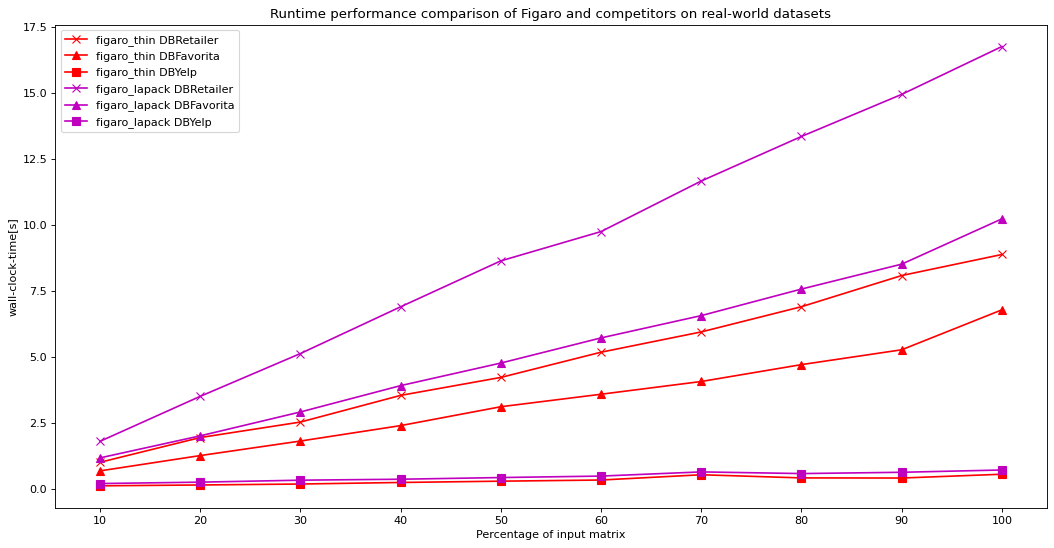

In [7]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('linear')
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro_thin": "r", "mkl": "b", "openblas": "g",
"post_proc_thin": "y", "post_proc_mkl": "c", "figaro_lapack": "m"
}

#print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    df_measurement = df_measurement_exps[exp_name]
    print(df_measurement)
    for db_name in df_measurement:
        #df_measurement[db_name]
        plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name), markersize=8)
plt.legend(loc="upper left")

plt.show()